In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import base64
warnings.simplefilter('ignore')
%matplotlib inline

In [85]:
data = pd.read_csv('/Users/takishun/files20220320/access_log.txt',delimiter=' ',names=('ymd','time','from_ip_adress','to_ip_address','HTTP','response','TorF','basic64'))

In [86]:
data['ymd']=data['ymd'].str.replace('[','')
data['time']=data['time'].str.replace(']','')
data['time']=pd.to_datetime(data['ymd'] + ' ' + data['time'],format='%Y-%m-%d %H:%M:%S+0900')
data['ymd']=pd.to_datetime(data['ymd'],format='%Y-%m-%d')

In [87]:
data

,ymd,time,from_ip_adress,to_ip_address,HTTP,response,TorF,basic64
0,2022-03-15,2022-03-15 00:42:19,190.57.140.171,133.242.178.40:80,GET / HTTP/1.1,200,False,R0VUIC8gSFRUUC8xLjEKSG9zdDogMTMzLjI0Mi4xNzguND...
1,2022-03-15,2022-03-15 01:22:48,45.137.21.166,133.242.178.40:80,GET / HTTP/1.1,200,False,R0VUIC8gSFRUUC8xLjEKSG9zdDogMTMzLjI0Mi4xNzguND...
2,2022-03-15,2022-03-15 01:27:47,128.1.248.26,133.242.178.40:80,GET / HTTP/1.1,200,False,R0VUIC8gSFRUUC8xLjEKSG9zdDogMTMzLjI0Mi4xNzguND...
3,2022-03-15,2022-03-15 02:50:09,109.237.96.124,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,UE9TVCAvYXV0b2Rpc2NvdmVyIEhUVFAvMS4xCkhvc3Q6ID...
4,2022-03-15,2022-03-15 02:50:10,194.40.243.169,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,UE9TVCAvYXV0b2Rpc2NvdmVyIEhUVFAvMS4xCkhvc3Q6ID...
...,...,...,...,...,...,...,...,...
4242,2022-03-20,2022-03-20 09:27:58,45.83.67.121,133.242.178.40:80,GET /favicon.ico HTTP/1.1,200,False,R0VUIC9mYXZpY29uLmljbyBIVFRQLzEuMQpIb3N0OiAxMz...
4243,2022-03-20,2022-03-20 09:55:47,103.161.17.249,133.242.178.40:80,GET / HTTP/1.1,200,False,R0VUIC8gSFRUUC8xLjEKSG9zdDogMTMzLjI0Mi4xNzguND...
4244,2022-03-20,2022-03-20 09:57:29,45.190.158.242,blank:80,GET / HTTP/1.1,200,False,R0VUIC8gSFRUUC8xLjEKCg==
4245,2022-03-20,2022-03-20 10:16:55,184.105.139.68,133.242.178.40:80,GET / HTTP/1.1,200,False,R0VUIC8gSFRUUC8xLjEKSG9zdDogMTMzLjI0Mi4xNzguND...


In [88]:
for i in range(0,len(data['basic64'])):
    data['basic64'][i] = base64.b64decode(data['basic64'][i]).decode()

In [73]:
b64_decL = [base64.b64decode(data['basic64'][i]).decode().split('\n') for i in range(0,len(data['basic64']))] 

In [177]:
data['res']=data['HTTP']
data['url']=data['HTTP']
for i in range(0,len(data['HTTP'])):
    data['res'][i] = data['HTTP'].str.split()[i][0]
    data['url'][i] = data['HTTP'].str.split()[i][2]

In [178]:
data

,ymd,time,from_ip_adress,to_ip_address,HTTP,response,TorF,basic64,res,url
ymd,,,,,,,,,,
2022-03-15,2022-03-15,2022-03-15 00:42:19,190.57.140.171,133.242.178.40:80,GET / HTTP/1.1,200,False,GET / HTTP/1.1\nHost: 133.242.178.40:80\nUser-...,GET,HTTP/1.1
2022-03-15,2022-03-15,2022-03-15 01:22:48,45.137.21.166,133.242.178.40:80,GET / HTTP/1.1,200,False,GET / HTTP/1.1\nHost: 133.242.178.40\nUser-Age...,GET,HTTP/1.1
2022-03-15,2022-03-15,2022-03-15 01:27:47,128.1.248.26,133.242.178.40:80,GET / HTTP/1.1,200,False,GET / HTTP/1.1\nHost: 133.242.178.40\nUser-Age...,GET,HTTP/1.1
2022-03-15,2022-03-15,2022-03-15 02:50:09,109.237.96.124,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,POST /autodiscover HTTP/1.1\nHost: 133.242.178...,POST,HTTP/1.1
2022-03-15,2022-03-15,2022-03-15 02:50:10,194.40.243.169,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,POST /autodiscover HTTP/1.1\nHost: 133.242.178...,POST,HTTP/1.1
...,...,...,...,...,...,...,...,...,...,...
2022-03-20,2022-03-20,2022-03-20 09:27:58,45.83.67.121,133.242.178.40:80,GET /favicon.ico HTTP/1.1,200,False,GET /favicon.ico HTTP/1.1\nHost: 133.242.178.4...,GET,HTTP/1.1
2022-03-20,2022-03-20,2022-03-20 09:55:47,103.161.17.249,133.242.178.40:80,GET / HTTP/1.1,200,False,GET / HTTP/1.1\nHost: 133.242.178.40:80\nUser-...,GET,HTTP/1.1
2022-03-20,2022-03-20,2022-03-20 09:57:29,45.190.158.242,blank:80,GET / HTTP/1.1,200,False,GET / HTTP/1.1\n\n,GET,HTTP/1.1


In [164]:
data['res'][0]

'GET'

<AxesSubplot:>

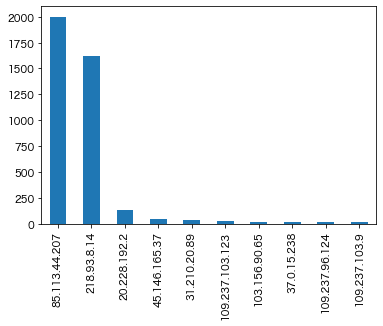

In [140]:
data['from_ip_adress'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:>

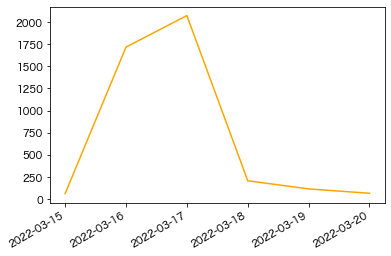

In [106]:
data['ymd'].value_counts().plot(color='orange')

In [181]:
class log_analytic_code:
    def __init__(self,fpass):
        import pandas as pd
        import matplotlib.pyplot as plt
        import warnings
        import base64
        warnings.simplefilter('ignore')
        %matplotlib inline
        self.fpass = pd.read_csv(fpass,delimiter=' ',names=('ymd','time','from_ip_adress','to_ip_address','HTTP','response','TorF','basic64'))
    
    def make_access_plot(self):
        self.fpass['ymd'].value_counts().plot(color='orange')
        plt.xlabel('日付')
        plt.ylabel('アクセス数')
        plt.grid()
        plt.savefig('access_count.png')
    
    def make_ip_count(self,rank_c):
        self.fpass['from_ip_adress'].value_counts().sort_values(ascending=False).head(rank_c).plot(kind='bar')
        self.fpass['from_ip_adress'].value_counts().sort_values(ascending=False).to_csv('ip.csv')
        print(self.fpass['from_ip_adress'].value_counts().sort_values(ascending=False).head(rank_c))
        plt.ylabel('アクセス数')
        plt.xlabel('ipアドレス')
        plt.savefig('ip_adress_count.png')
        
    def make_response_plot(self):
        self.fpass['response'].value_counts().sort_values(ascending=False).plot(kind='bar')
        print(self.fpass['from_ip_adress'].value_counts().sort_values(ascending=False))
        plt.ylabel('頻度')
        plt.xlabel('レスポンス')
        plt.savefig('response.png')
        
    def make_url_plot(self):
        pass
    
    def make_http_plot(self):
        pass
    
    def display(self):
        print(self.fpass)
    
    def mung(self):
        self.fpass['ymd']=self.fpass['ymd'].str.replace('[','')
        self.fpass['time']=self.fpass['time'].str.replace(']','')
        self.fpass['time']=pd.to_datetime(self.fpass['ymd'] + ' ' + self.fpass['time'],format='%Y-%m-%d %H:%M:%S+0900')
        self.fpass['ymd']=pd.to_datetime(self.fpass['ymd'],format='%Y-%m-%d')
        for i in range(0,len(data['basic64'])):
            self.fpass['basic64'][i] = base64.b64decode(self.fpass['basic64'][i]).decode()
            
        self.fpass['res']=self.fpass['HTTP']
        self.fpass['url']=self.fpass['HTTP']
        for i in range(0,len(data['HTTP'])):
            self.fpass['res'][i] = self.fpass['HTTP'].str.split()[i][0]
            self.fpass['url'][i] = self.fpass['HTTP'].str.split()[i][2]
            
        return self.fpass

if __name__ == "__main__":
    pass

85.113.44.207      2001
218.93.8.14        1625
20.228.192.2        132
45.146.165.37        44
31.210.20.89         34
109.237.103.123      22
103.156.90.65        21
37.0.15.238          17
109.237.96.124       17
109.237.103.9        16
Name: from_ip_adress, dtype: int64


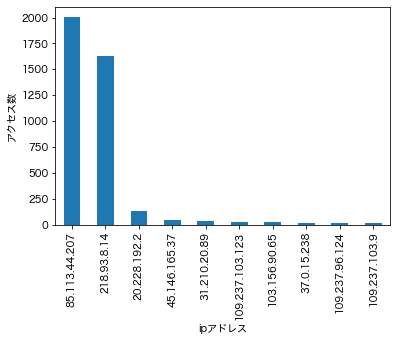

In [182]:
a = log_analytic_code('/Users/takishun/files20220320/access_log.txt') 
a.mung()
a.make_ip_count(10)

In [183]:
a.display()

            ymd                time  from_ip_adress      to_ip_address  \
0    2022-03-15 2022-03-15 00:42:19  190.57.140.171  133.242.178.40:80   
1    2022-03-15 2022-03-15 01:22:48   45.137.21.166  133.242.178.40:80   
2    2022-03-15 2022-03-15 01:27:47    128.1.248.26  133.242.178.40:80   
3    2022-03-15 2022-03-15 02:50:09  109.237.96.124  133.242.178.40:80   
4    2022-03-15 2022-03-15 02:50:10  194.40.243.169  133.242.178.40:80   
...         ...                 ...             ...                ...   
4242 2022-03-20 2022-03-20 09:27:58    45.83.67.121  133.242.178.40:80   
4243 2022-03-20 2022-03-20 09:55:47  103.161.17.249  133.242.178.40:80   
4244 2022-03-20 2022-03-20 09:57:29  45.190.158.242           blank:80   
4245 2022-03-20 2022-03-20 10:16:55  184.105.139.68  133.242.178.40:80   
4246 2022-03-20 2022-03-20 11:26:25    128.1.248.42  133.242.178.40:80   

                             HTTP  response   TorF  \
0                  GET / HTTP/1.1       200  False   
1  